Домашнее задание 1: Обработка и анализ изображений

Цель: Применить базовые методы обработки изображений для улучшения качества и выделения ключевых признаков.
Задание:
1. Загрузка и отображение изображения:
    * Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
    * С помощью библиотек OpenCV или PIL загрузите изображение в программу.
    * Отобразите исходное изображение.
2. Преобразование цветовых пространств:
    * Преобразуйте изображение из RGB в Grayscale и HSV.
    * Отобразите каждое из полученных изображений.
    * Постройте гистограммы яркости для исходного и серого изображений.
3. Фильтрация изображений:
    * Примените к серому изображению следующие фильтры:
        * Гауссово сглаживание с разными значениями σ (сигма).
        * Медианный фильтр с разными размерами ядра.
        * Фильтр Лапласа для повышения резкости.
    * Отобразите результаты фильтрации и сравните их визуально.
4. Выделение краев и углов:
    * Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
    * Примените алгоритм Кэнни для обнаружения краев.
    * Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
    * Наложите результаты на исходное изображение и отобразите.
5. Морфологические операции:
    * Бинаризуйте серое изображение с помощью пороговой сегментации.
    * Примените операции эрозии и дилатации с различными структурными элементами.
    * Отобразите результаты и объясните эффект каждой операции.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

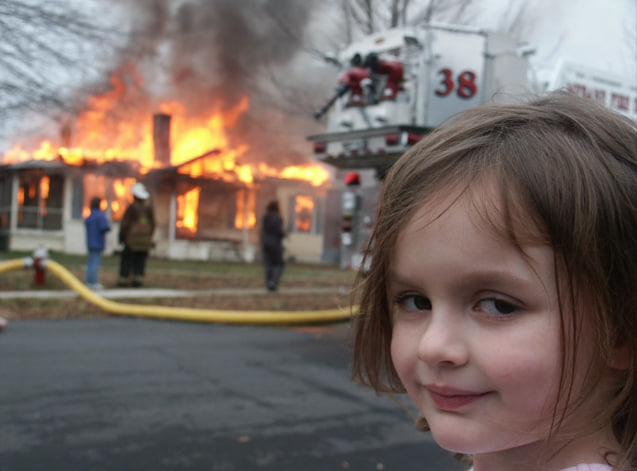

In [2]:
img = cv2.imread('meme.jpg')
cv2_imshow(img)

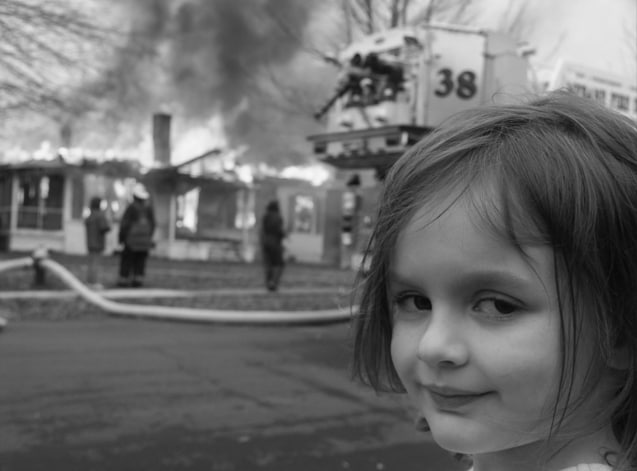

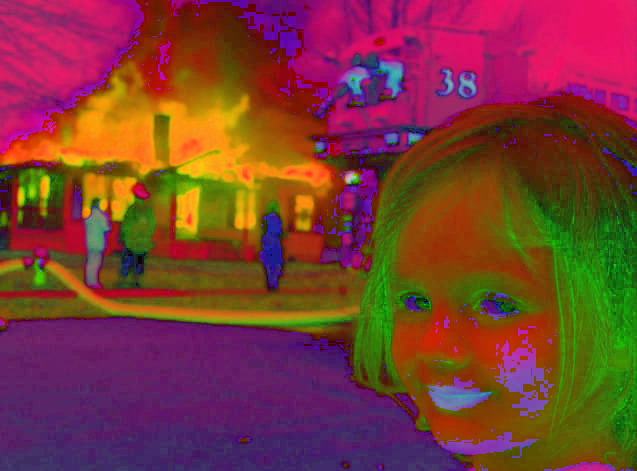

In [3]:
# Преобразуем изображение в grayscale и HSV
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(gray_img)
cv2_imshow(hsv_img)

<ipython-input-4-557a0a9c7acd>:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(121), plt.hist(img.ravel(),256,[0,256]), plt.title('Histogram of Original Image')
<ipython-input-4-557a0a9c7acd>:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(122), plt.hist(gray_img.ravel(),256,[0,256]), plt.title('Histogram of Grayscale Image')


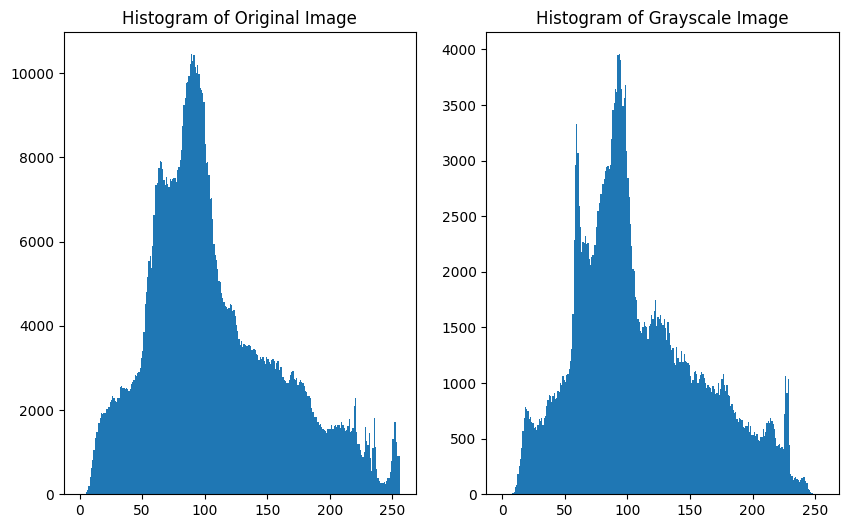

In [4]:
# Построим гистограмму яркости для исходного и серого изображений
plt.figure(figsize=(10,6))
plt.subplot(121), plt.hist(img.ravel(),256,[0,256]), plt.title('Histogram of Original Image')
plt.subplot(122), plt.hist(gray_img.ravel(),256,[0,256]), plt.title('Histogram of Grayscale Image')
plt.show()

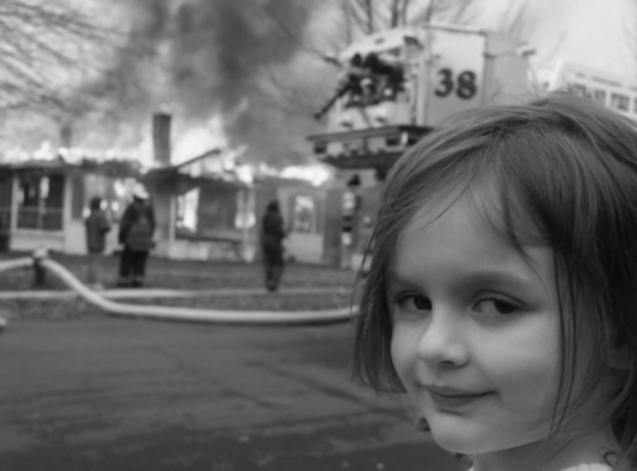

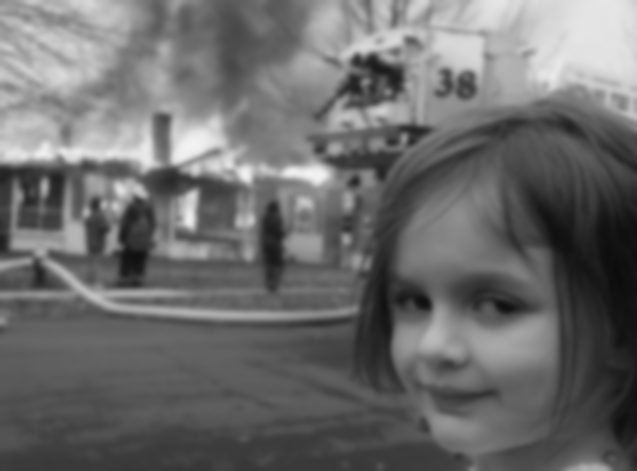

In [10]:
# Фильтры для grayscale изображения
# Гауссово сглаживание с разными значениями σ (сигма).
blur1 = cv2.GaussianBlur(gray_img, (3,3), 0)
blur2 = cv2.GaussianBlur(gray_img, (13,13), 0)
cv2_imshow(blur1)
cv2_imshow(blur2)

Вывод: когда $\sigma$ маленькое, фильтр оказывает слабое воздействие на изображение. Размытие минимально, и контуры объектов остаются четкими. Этот может быть полезно, когда необходимо слегка сгладить шумы, сохраняя при этом важные детали изображения.

При увеличении $\sigma$ размытие становится сильнее. Контуры объектов размываются, и мелкие детали теряются. Такой подход оправдан, если нужно удалить мелкие детали.

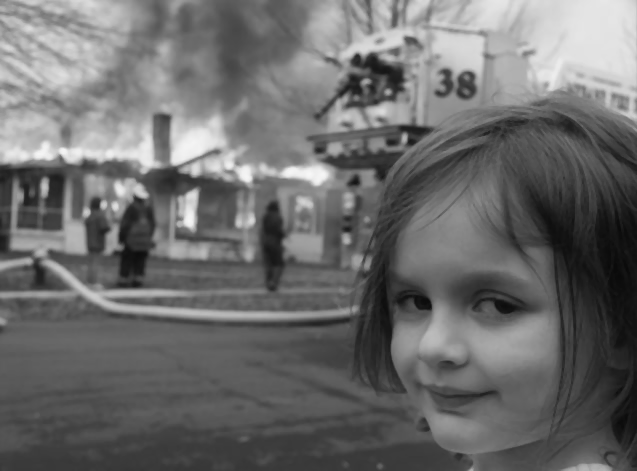

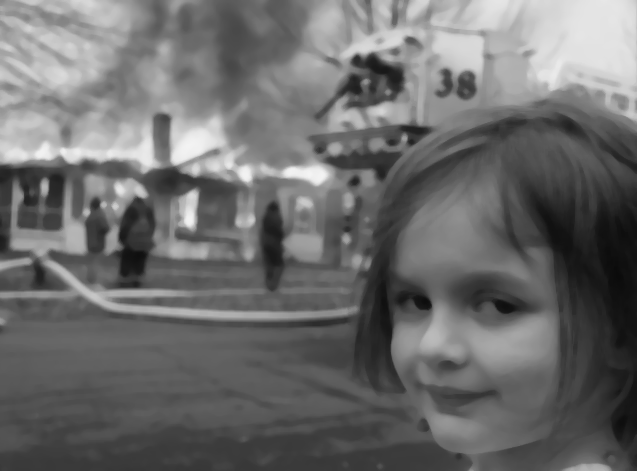

In [6]:
# Медианный фильтр с разными размерами ядра.
median_filter_1 = cv2.medianBlur(gray_img, 3)
median_filter_2 = cv2.medianBlur(gray_img, 7)
cv2_imshow(median_filter_1)
cv2_imshow(median_filter_2)

Вывод: размер ядра влияет на степень сглаживания изображения:

- Маленькие ядра (например, 3x3) оказывают менее заметное влияние на мелкие детали и шумы.

- Большие ядра (например, 7x7) сильнее сглаживают изображение, устраняя более крупные дефекты, но также могут размыть важные детали.

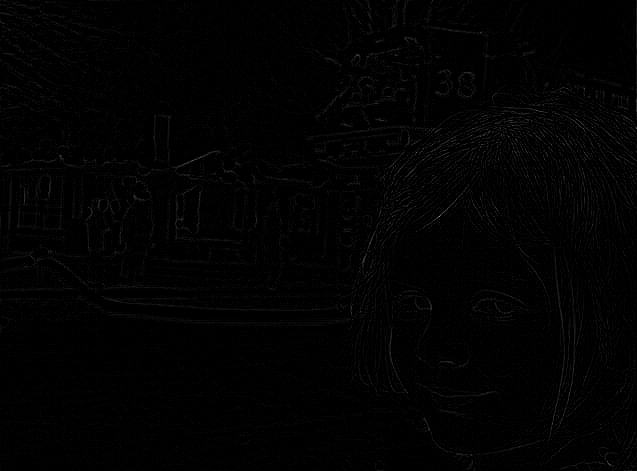

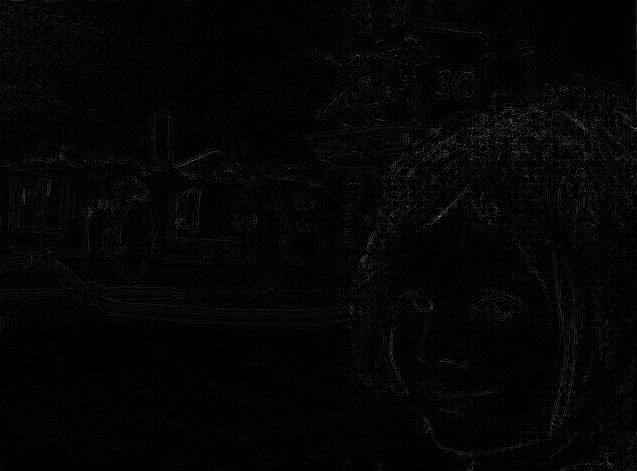

In [ ]:
# Фильтр Лапласа для повышения резкости.
laplacian_filter = cv2.Laplacian(gray_img, cv2.CV_64F)
cv2_imshow(laplacian_filter)

laplacian = np.uint8(np.absolute(laplacian_filter))
cv2_imshow(laplacian)

Вывод: фильтр Лапласа выделяет участки изображения, где происходят значительные изменения интенсивности, то есть края.

Однако сам по себе Лапласиан возвращает изображение, где края выделены как положительные и отрицательные значения (в зависимости от направления градиента). Поэтому для повышения резкости, если интересует сам факт наличия изменений яркости (границ), а не направление градиента, может быть полезно применить np.absolute().

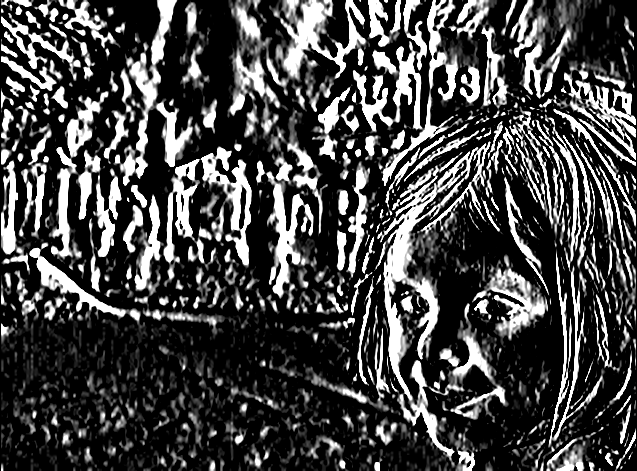

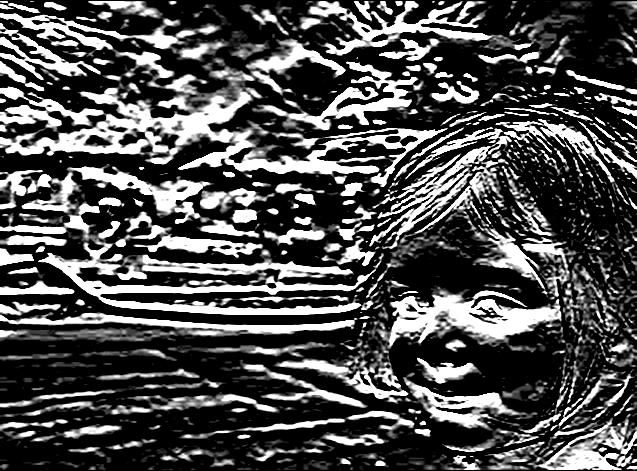

In [11]:
# оператор Собеля для определения горизонтальных и вертикальных градиентов
sobelx = cv2.Sobel(gray_img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray_img,cv2.CV_64F,0,1,ksize=5)

cv2_imshow(sobelx)
cv2_imshow(sobely)

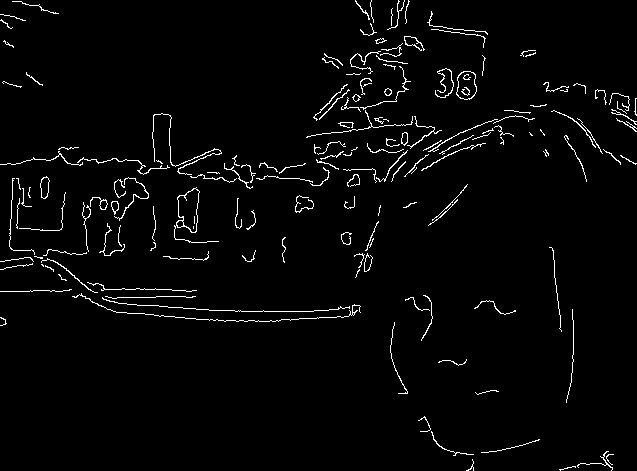

In [12]:
# алгоритм Кэнни для обнаружения краев
edges = cv2.Canny(gray_img,100,200)
cv2_imshow(edges)

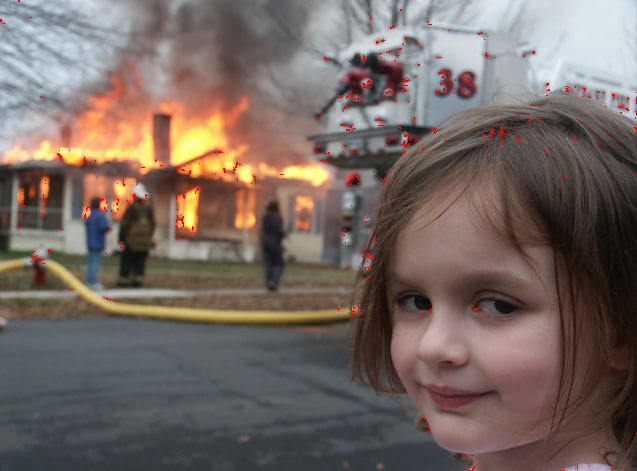

In [13]:
#  детектор углов Harris
corners = cv2.cornerHarris(gray_img,2,3,0.04)
dst = img.copy()
dst[corners > 0.01 * corners.max()] = [0,0,255]
cv2_imshow(dst)

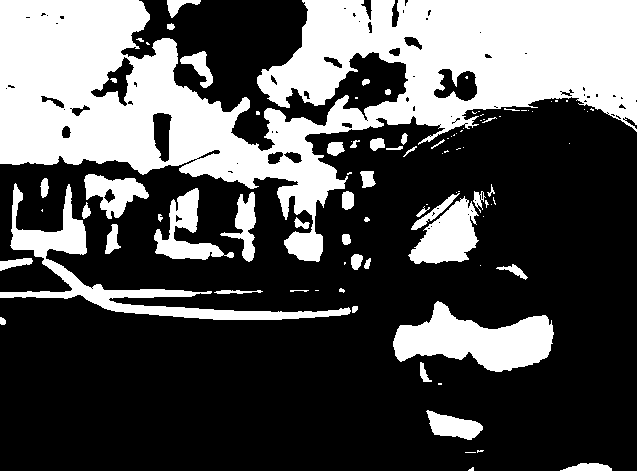

In [15]:
# Выполняем бинаризацию с использованием метода Otsu
_, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(binary_img)

In [32]:
# Создадим различные ядра для морфологических операций
kernels = [np.ones((i, i), dtype=np.uint8) for i in range(1, 32, 10)]

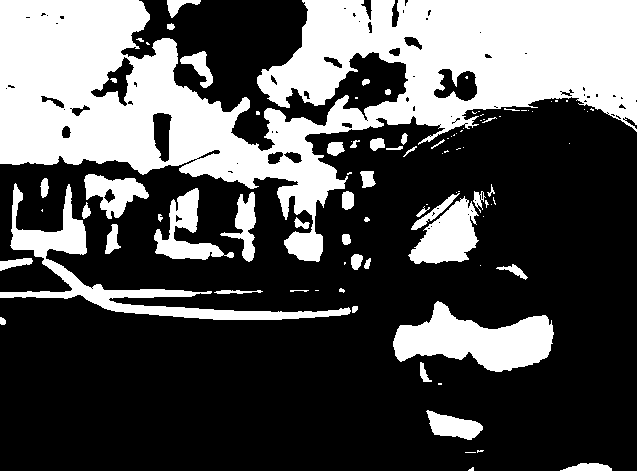

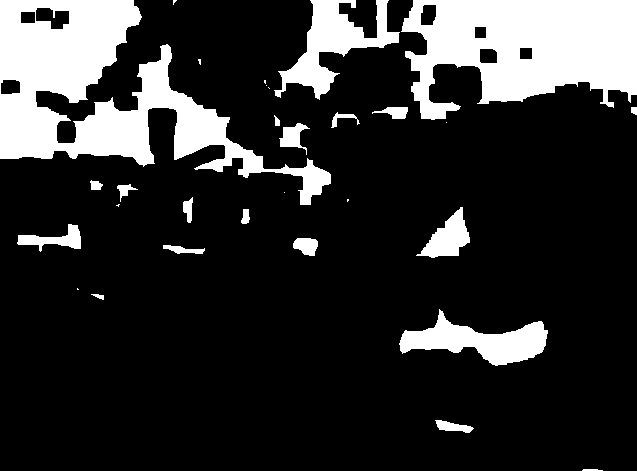

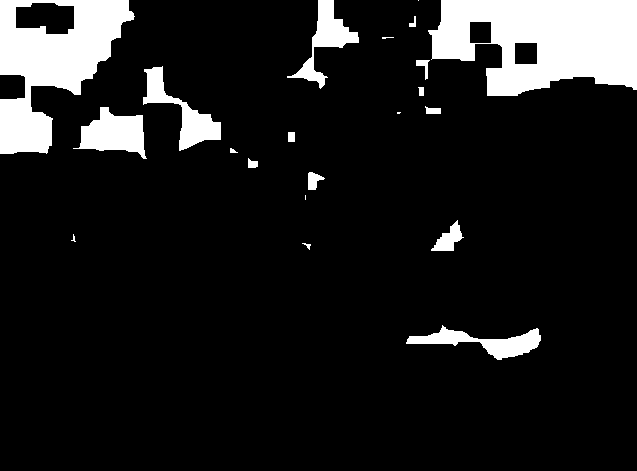

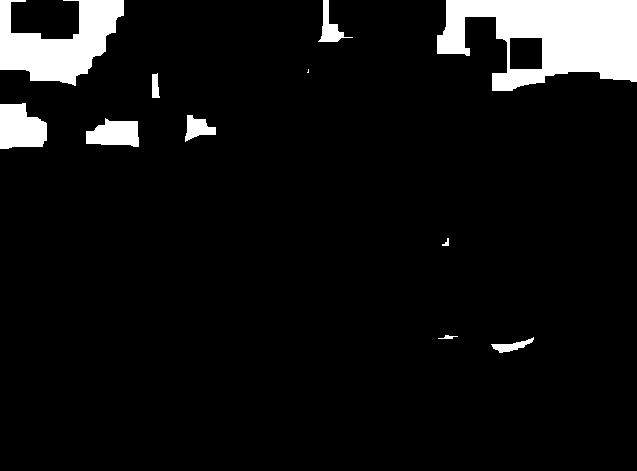

In [33]:
# операция эрозии
for kernel in kernels:
    erosion = cv2.erode(binary_img,kernel,iterations = 1)
    cv2_imshow(erosion)

Вывод: эрозия уменьшает объекты на изображении, удаляет небольшие структуры и сужает границы областей. Эрозию используют для очистки изображений от незначительных артефактов и для отделения близко расположенных объектов друг от друга. Большой размер ядра приводит к более интенсивной эрозии, удаляя больше пикселей вдоль границ объектов.


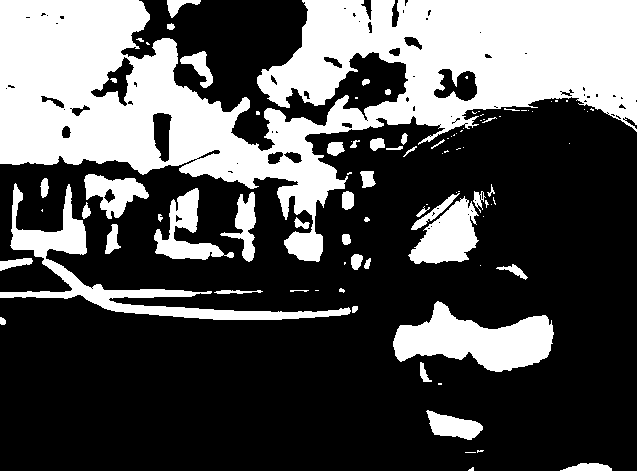

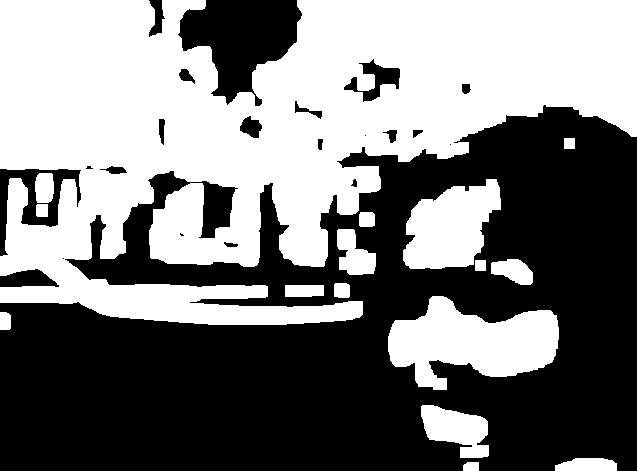

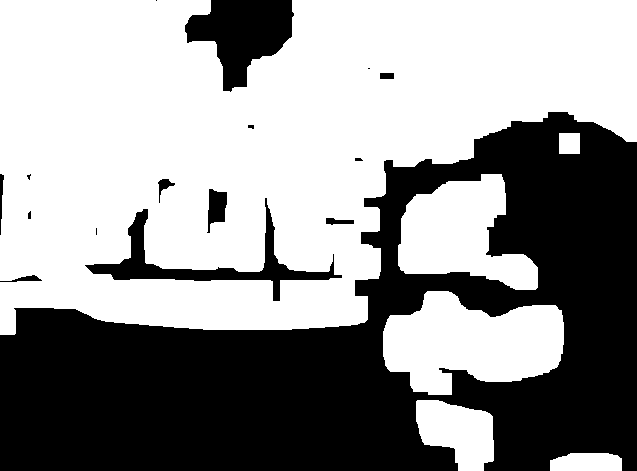

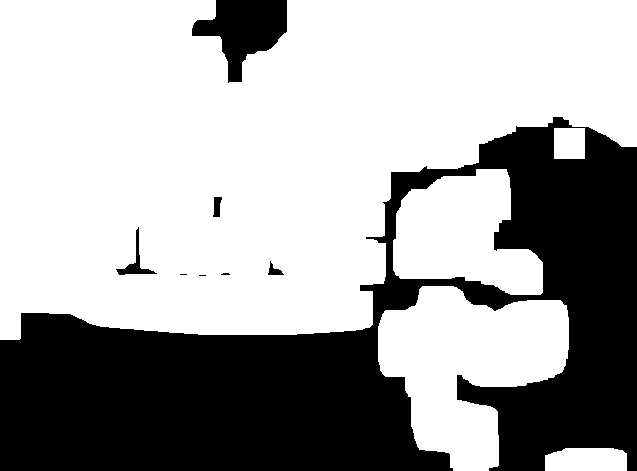

In [34]:
# операция дилатации
for kernel in kernels:
    dilation = cv2.dilate(binary_img,kernel,iterations = 1)
    cv2_imshow(dilation)

Вывод: дилатация увеличивает объекты на изображении, расширяет границы областей и заполняет маленькие дыры, объединяя близко расположенные объекты. Операция аналогична эрозии, но вместо замены пикселей на фоновые, она заменяет их на пиксели объекта.

Размер ядра в дилатации контролирует силу расширения объектов в изображении. Маленькие ядра производят минимальное воздействие, в то время как большие ядра вызывают значительное увеличение объектов и заполнение больших промежутков.